# PP5 - Mildew Detection in CHerry Leaves

## Notebook 2 - Data Visualization

### Objectives

* Fetch data from kaggle and prepare data for further processes.


### Inputs

* Dataset: [Kaggle](https://www.kaggle.com/datasets/codeinstitute/cherry-leaves/data)

| **input**       |          |        |
|-----------------|----------|--------|
| **train/**      | healthy  | mildew |
| **test/**       | healthy  | mildew |
| **validation/** | healthy  | mildew |


### Outputs
- Data/Image visualization
- outputs/{version}


---

## Preparation

### Manage Directories

**Change working directory**

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/ml-mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [2]:
os.chdir('/workspace/ml-mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/ml-mildew-detection-in-cherry-leaves'

**Set Input Directory**

In [4]:
data_dir= 'input/cherry-leaves'
train_path = data_dir + '/train'
val_path = data_dir + '/validation'
test_path = data_dir + '/test'
print(f"Train Set Path: {train_path}")
print(f"Validation Set Path: {val_path}")
print(f"Test Set Path: {test_path}")

Train Set Path: input/cherry-leaves/train
Validation Set Path: input/cherry-leaves/validation
Test Set Path: input/cherry-leaves/test


**Set Output Directory**

In [5]:
version = 'v1'

In [6]:
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

print(file_path)

Old version is already available create a new version.
outputs/v1


**Set Label Names**

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'mildew']


---

## Data visualisation of Image Data

**Import Libraries**

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

**Get current Image Shape**

In [9]:
img_height, img_width = [], []

for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, image_filename))
        d1, d2, colors = img.shape
        img_height.append(d1)
        img_width.append(d2)


In [10]:
img_height_mean = int(np.array(img_height).mean())
img_width_mean = int(np.array(img_width).mean())

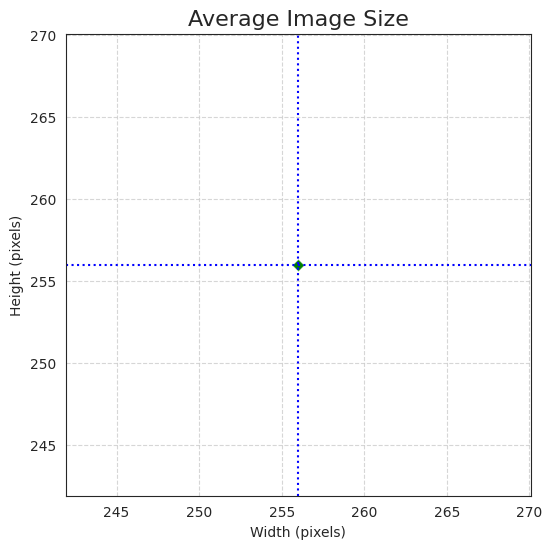

Image Width average: 256 
Image Height average: 256


In [11]:
sns.set_style("white")
fig, axes = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=img_width, y=img_height, alpha=0.3, color='green', marker='D')
axes.set_xlabel("Width (pixels)", fontsize=10)
axes.set_ylabel("Height (pixels)", fontsize=10)
axes.axvline(x=img_height_mean, color='blue', linestyle=':')
axes.axhline(y=img_width_mean, color='blue', linestyle=':')
plt.title("Average Image Size", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

print(f"Image Width average: {img_width_mean} \nImage Height average: {img_height_mean}")

In [12]:
num_color_channels = 3
image_shape = (img_height_mean, img_width_mean, num_color_channels)
image_shape

(256, 256, 3)

**Save image shape for further usage**

In [13]:
joblib.dump(value=image_shape, filename=f"{file_path}/avg_image_shape_train.pkl")

['outputs/v1/avg_image_shape_train.pkl']